<a href="https://colab.research.google.com/github/victorjoseij/Natural_language_processing/blob/main/RNN2_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv('/content/seattle-weather.csv')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Data preprocessing
scaler = MinMaxScaler()
df[['precipitation', 'temp_max', 'temp_min', 'wind']] = scaler.fit_transform(df[['precipitation', 'temp_max', 'temp_min', 'wind']])

# Convert data to sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length - 1):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 3
X, y = create_sequences(df[['precipitation', 'temp_max', 'temp_min', 'wind']].values, seq_length)

# Define the RNN model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 4)))
model.add(Dense(4))

model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=100, batch_size=1)

# Make predictions
predictions = model.predict(X)


Epoch 1/100
1457/1457 [==============================] - 5s 3ms/step - loss: 0.0183
Epoch 2/100
1457/1457 [==============================] - 7s 5ms/step - loss: 0.0124
Epoch 3/100
1457/1457 [==============================] - 8s 5ms/step - loss: 0.0119
Epoch 4/100
1457/1457 [==============================] - 9s 6ms/step - loss: 0.0115
Epoch 5/100
1457/1457 [==============================] - 4s 3ms/step - loss: 0.0113
Epoch 6/100
1457/1457 [==============================] - 4s 3ms/step - loss: 0.0111
Epoch 7/100
1457/1457 [==============================] - 5s 3ms/step - loss: 0.0111
Epoch 8/100
1457/1457 [==============================] - 4s 3ms/step - loss: 0.0110
Epoch 9/100
1457/1457 [==============================] - 4s 3ms/step - loss: 0.0109
Epoch 10/100
1457/1457 [==============================] - 5s 3ms/step - loss: 0.0109
Epoch 11/100
1457/1457 [==============================] - 4s 3ms/step - loss: 0.0109
Epoch 12/100
1457/1457 [==============================] - 4s 3ms/step - lo

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

10/10 [==============================] - 0s 4ms/step - loss: 0.0083
Test Loss: 0.008305125869810581


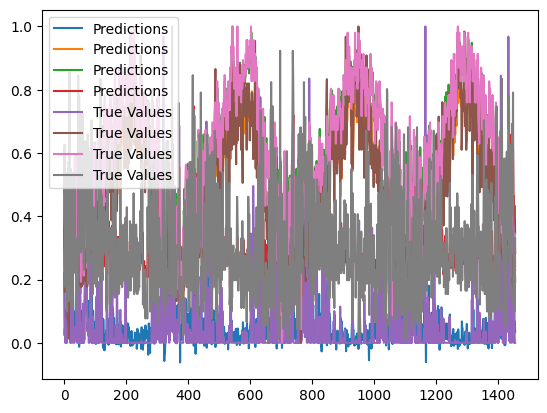

In [ ]:
# Evaluate the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

# Visualize Predictions
plt.plot(predictions, label='Predictions')
plt.plot(y, label='True Values')
plt.legend()
plt.show()